## Tasks:

#### Exploratory Data Analysis:
1. Handling Missing Values
2. Check the distribution of target variable
3. Categorical and numerical features analysis
4. Analysis of categorical features w.r.t target feature y

### Preprocessing
1. Remove unnecessary features
2. Encoding of categorical features
3. Check the correlation

### Model training
1. Design Model

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', None)

In [3]:
original_dataset = pd.read_csv('data/train.csv')

In [4]:
dataset = original_dataset.copy() # Make copy original dataset

In [5]:
dataset.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    0    1    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    0   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    0    0    0    0    0    1    0    0    0    1    0   
2    1    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
3    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
4    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   

   X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  \
0    0    0    1    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0   
2    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
3    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
4    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   

   X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  \
0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
1    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
2    0    0    0    1    0    0    1    0    0    0    1    0    0    1    0   
3    0    0    0    0    0    0    1    0    0    0    0    0    0    1    0   
4    0    0    0    1    0    0    1    0    0    0    0    0    0    1    0   

   X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  \
0    0    0    0    0    0    1    0    1    0    0    1    0    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    1    0    0    0    0   
2    0    0    0    0    0    1    0    1    1    0    1    1    1    0    0   
3    0    0    0    0    0    0    0    1    1    0    1    0    1    0    0   
4    0    0    0    0    0    0    0    1    0    0    1    0    1    0    0   

   X79  X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  \
0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
1    0    1    0    0    0    0    1    0    0    0    0    0    0    0    0   
2    0    1    0    0    0    1    1    0    0    0    0    0    0    0    0   
3    0    1    0    0    0    1    0    0    0    0    0    0    0    0    0   
4    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X94  X95  X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  \
0    0    0    0    0    0    0     0     0     0     0     0     0     0   
1    0    0    1    0    1    0     1     1     0     0     0     0     0   
2    0    0    1    0    1    0     0     1     0     0     0     0     0   
3    0    0    1    0    1    0     0     1     0     0     0     0     0   
4    0    0    1    0    1    0     0     1     0     0     0     0     0   

   X107  X108  X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  \
0     0     0     0     0     1     0     0     1     0     1     0     1   
1     0     0     0     0     1     0     0     0     0     0     0     1   
2     0     0     0     0     1     0     0     0     0     0     0     0   
3     0     1     0     0     1     0     0     1     0     0     0     0   
4     0     1     0     0     1     0     0     1     0     0     0     0   

   X119  X120  X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  \
0     1     1     0     0     0     0     0     0     1     0     0     1   
1     1     1     0     0     0     0     0     1

In [6]:
dataset.info()    # Total number of columns are 378 including Id and target variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
dataset.shape

(4209, 378)

In [8]:
dataset.drop('ID', axis=1, inplace=True)   # Drop Id column as there is not use of it

In [9]:
dataset.head()

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  X17  \
0  130.81   k  v  at  a  d  u  j  o    0    0    0    1    0    0    0    0   
1   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0    0   
2   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    0    1   
3   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0    0   
4   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0    0   

   X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  \
0    1    0    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    1    0    0    0    0    0    0    0    1    0    0    0    1    0    0   
2    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
3    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
4    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   

   X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  \
0    0    1    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    0    1    0    1    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
3    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
4    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   

   X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    1    0    0    0    0    0    0    0    0    0    1    0    0   
2    0    0    1    0    0    1    0    0    0    1    0    0    1    0    0   
3    0    0    0    0    0    1    0    0    0    0    0    0    1    0    0   
4    0    0    1    0    0    1    0    0    0    0    0    0    1    0    0   

   X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  \
0    0    0    0    0    1    0    1    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
2    0    0    0    0    1    0    1    1    0    1    1    1    0    0    0   
3    0    0    0    0    0    0    1    1    0    1    0    1    0    0    0   
4    0    0    0    0    0    0    1    0    0    1    0    1    0    0    0   

   X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  X94  \
0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
1    1    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
2    1    0    0    0    1    1    0    0    0    0    0    0    0    0    0   
3    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X95  X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X107  \
0    0    0    0    0    0     0     0     0     0     0     0     0     0   
1    0    1    0    1    0     1     1     0     0     0     0     0     0   
2    0    1    0    1    0     0     1     0     0     0     0     0     0   
3    0    1    0    1    0     0     1     0     0     0     0     0     0   
4    0    1    0    1    0     0     1     0     0     0     0     0     0   

   X108  X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  \
0     0     0     0     1     0     0     1     0     1     0     1     1   
1     0     0     0     1     0     0     0     0     0     0     1     1   
2     0     0     0     1     0     0     0     0     0     0     0     0   
3     1     0     0     1     0     0     1     0     0     0     0     0   
4     1     0     0     1     0     0     1     0     0     0     0     0   

   X120  X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  \
0     1     0     0     0     0     0     0     1     0     0     1     0   
1     1     0     0     0     0     0     

In [10]:
dataset.describe() # Only will display numerical features

y          X10     X11          X12          X13  \
count  4209.000000  4209.000000  4209.0  4209.000000  4209.000000   
mean    100.669318     0.013305     0.0     0.075077     0.057971   
std      12.679381     0.114590     0.0     0.263547     0.233716   
min      72.110000     0.000000     0.0     0.000000     0.000000   
25%      90.820000     0.000000     0.0     0.000000     0.000000   
50%      99.150000     0.000000     0.0     0.000000     0.000000   
75%     109.010000     0.000000     0.0     0.000000     0.000000   
max     265.320000     1.000000     0.0     1.000000     1.000000   

               X14          X15          X16          X17          X18  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.428130     0.000475     0.002613     0.007603     0.007840   
std       0.494867     0.021796     0.051061     0.086872     0.088208   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X19          X20          X21          X22          X23  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.099549     0.142789     0.002613     0.086957     0.020670   
std       0.299433     0.349899     0.051061     0.281805     0.142294   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X24          X26          X27          X28          X29  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.001901     0.004989     0.682585     0.032549     0.043003   
std       0.043561     0.070467     0.465526     0.177475     0.202888   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     1.000000     0.000000     0.000000   
75%       0.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X30          X31          X32          X33          X34  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.004514     0.232359     0.011167     0.000238     0.005464   
std       0.067043     0.422387     0.105093     0.015414     0.073729   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X35          X36          X37          X38          X39  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.232359     0.004514     0.232359     0.033262     0.000238   
std       0.422387     0.067043     0.422387     0.179341     0.015414   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X40          X41          X42          X43   

### Exploratory data analysis

##### 1. Check the missing values

In [11]:
dataset.isna().sum()  ## That's nice, we don't have any null entry

y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
X33     0
X34     0
X35     0
X36     0
X37     0
X38     0
X39     0
X40     0
X41     0
X42     0
X43     0
X44     0
X45     0
X46     0
X47     0
X48     0
X49     0
X50     0
X51     0
X52     0
X53     0
X54     0
X55     0
X56     0
X57     0
X58     0
X59     0
X60     0
X61     0
X62     0
X63     0
X64     0
X65     0
X66     0
X67     0
X68     0
X69     0
X70     0
X71     0
X73     0
X74     0
X75     0
X76     0
X77     0
X78     0
X79     0
X80     0
X81     0
X82     0
X83     0
X84     0
X85     0
X86     0
X87     0
X88     0
X89     0
X90     0
X91     0
X92     0
X93     0
X94     0
X95     0
X96     0
X97     0
X98     0
X99     0
X100    0
X101    0
X102    0


##### 2. Check the distribution of target variable

In [12]:
dataset.head()

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  X17  \
0  130.81   k  v  at  a  d  u  j  o    0    0    0    1    0    0    0    0   
1   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0    0   
2   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    0    1   
3   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0    0   
4   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0    0   

   X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  \
0    1    0    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    1    0    0    0    0    0    0    0    1    0    0    0    1    0    0   
2    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
3    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
4    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   

   X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  \
0    0    1    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    0    1    0    1    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
3    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
4    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   

   X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    1    0    0    0    0    0    0    0    0    0    1    0    0   
2    0    0    1    0    0    1    0    0    0    1    0    0    1    0    0   
3    0    0    0    0    0    1    0    0    0    0    0    0    1    0    0   
4    0    0    1    0    0    1    0    0    0    0    0    0    1    0    0   

   X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  \
0    0    0    0    0    1    0    1    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
2    0    0    0    0    1    0    1    1    0    1    1    1    0    0    0   
3    0    0    0    0    0    0    1    1    0    1    0    1    0    0    0   
4    0    0    0    0    0    0    1    0    0    1    0    1    0    0    0   

   X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  X94  \
0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
1    1    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
2    1    0    0    0    1    1    0    0    0    0    0    0    0    0    0   
3    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X95  X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X107  \
0    0    0    0    0    0     0     0     0     0     0     0     0     0   
1    0    1    0    1    0     1     1     0     0     0     0     0     0   
2    0    1    0    1    0     0     1     0     0     0     0     0     0   
3    0    1    0    1    0     0     1     0     0     0     0     0     0   
4    0    1    0    1    0     0     1     0     0     0     0     0     0   

   X108  X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  \
0     0     0     0     1     0     0     1     0     1     0     1     1   
1     0     0     0     1     0     0     0     0     0     0     1     1   
2     0     0     0     1     0     0     0     0     0     0     0     0   
3     1     0     0     1     0     0     1     0     0     0     0     0   
4     1     0     0     1     0     0     1     0     0     0     0     0   

   X120  X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  \
0     1     0     0     0     0     0     0     1     0     0     1     0   
1     1     0     0     0     0     0     

Text(0.5, 0, 'Target variable - y')

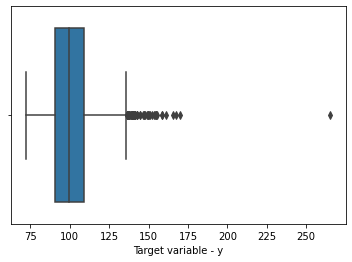

In [13]:
sns.boxplot(x='y', data=dataset)
plt.xlabel('Target variable - y')

Text(0.5, 0, 'Target variable - y')

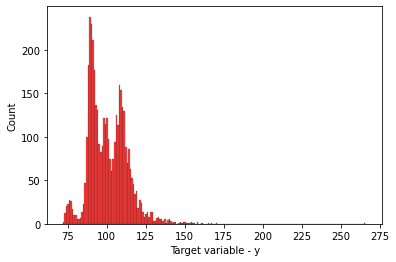

In [14]:
sns.histplot(data=dataset,x='y', bins=50, color='r', discrete=True)
plt.xlabel('Target variable - y')

##### From above, we conclude that maximum distribution of target lies with in 75 to 140,  beyond that are outliers

#### 3. Get the categorical and numerical features

In [15]:
dataset.info() # We see from here that we have 1 float feature, 368 as int and 8 as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [16]:
# Get the list of categorical features
feature_categorical = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
feature_categorical

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [17]:
# Get the list of numerical features
feature_numerical = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
feature_numerical

['y',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 'X126',
 'X127',
 'X128',
 'X129',
 'X130',
 'X131',
 'X132',
 '

In [18]:
# Number of unique categories
for feature in feature_categorical:
    print('Feature {} has {} unique categories'.format(feature, len(np.unique(dataset[feature]))))

Feature X0 has 47 unique categories
Feature X1 has 27 unique categories
Feature X2 has 44 unique categories
Feature X3 has 7 unique categories
Feature X4 has 4 unique categories
Feature X5 has 29 unique categories
Feature X6 has 12 unique categories
Feature X8 has 25 unique categories


#### 4. Analaysis of categorical features w.r.t target variable 'y'

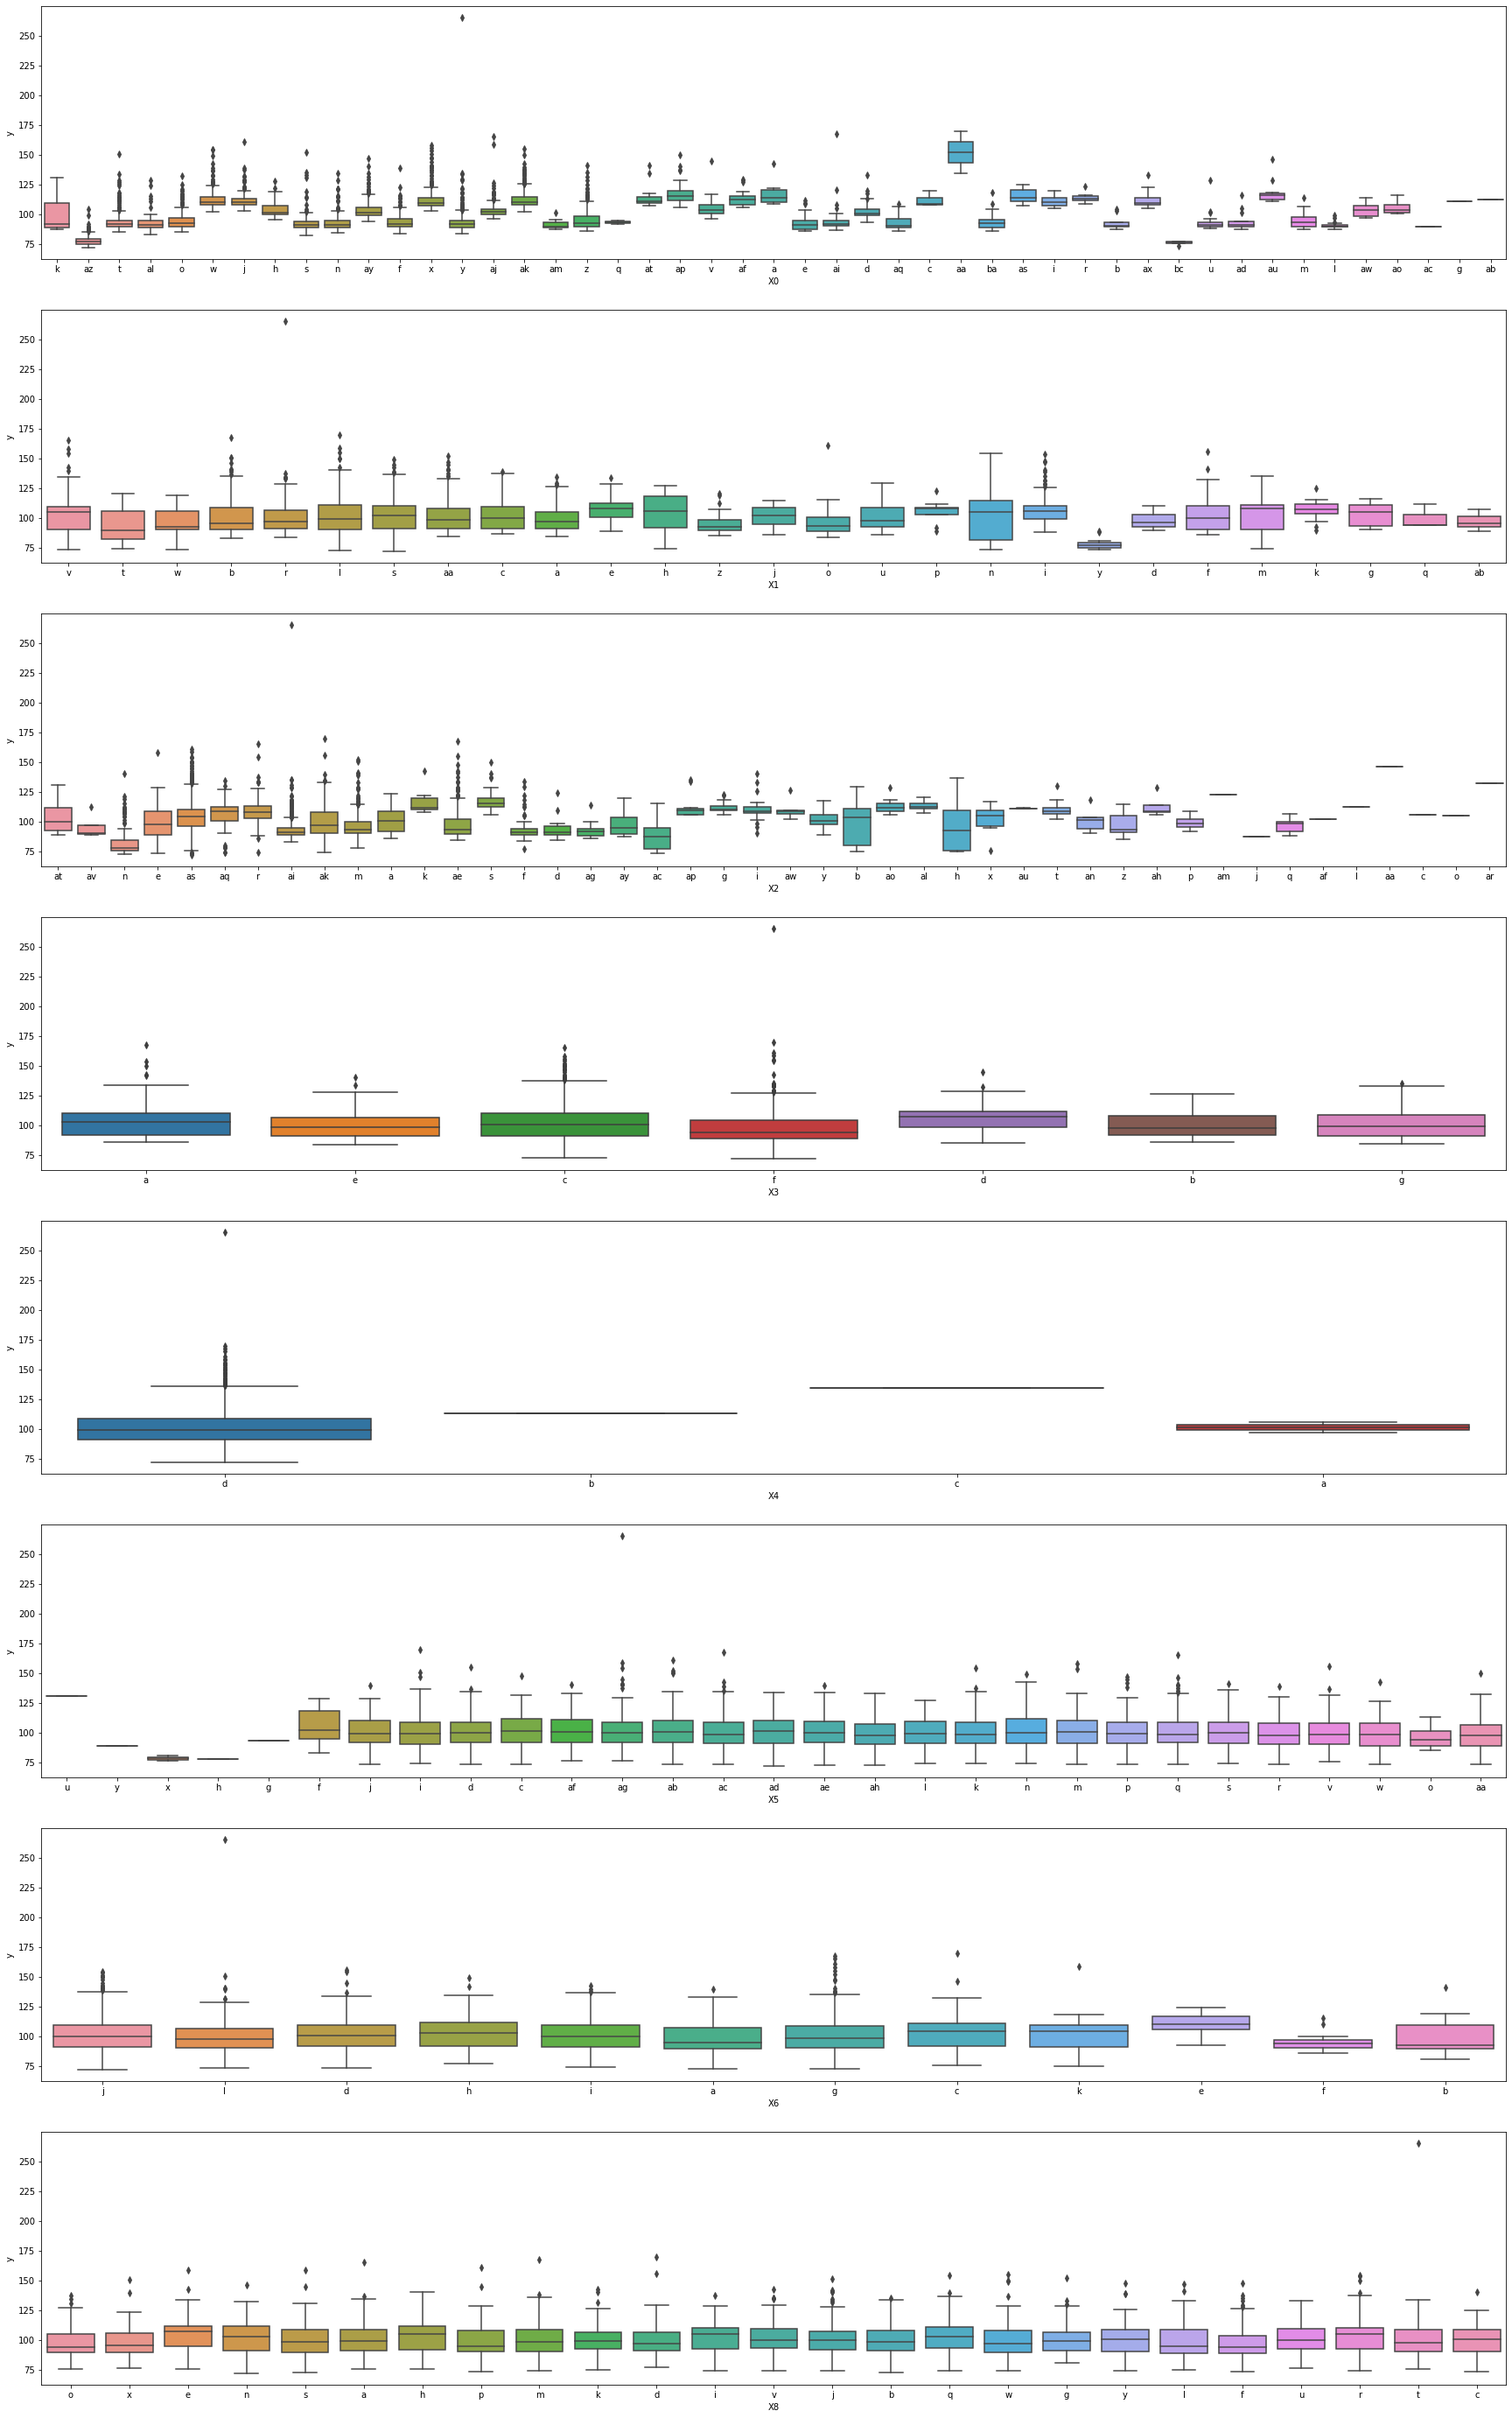

In [19]:
fig,ax = plt.subplots(len(feature_categorical), figsize=(30,50))
for i in range(len(feature_categorical)):
    sns.boxplot(x=feature_categorical[i], y='y', data=dataset, ax=ax[i])

### Preprocessing 

#### 1. Remove columns with only one unique value

In [20]:
columns_with_one_unique_values = [feature for feature in dataset.columns if len(np.unique(dataset[feature])) == 1]
columns_with_one_unique_values

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [21]:
# As there are only one repeatitive value, so we can remove these columns which is not useful in modeling
dataset.drop(columns=columns_with_one_unique_values, axis=1, inplace=True)

In [22]:
dataset.head() # Columns are removed

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  X18  \
0  130.81   k  v  at  a  d  u  j  o    0    0    1    0    0    0    0    1   
1   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0    1   
2   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    1    0   
3   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0    0   
4   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0    0   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
0    0    0    1    0    0    0    0    0    0    0    0    1    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
3    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
4    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
0    1    0    1    0    0    0    0    0    0    0    0    1    0    0    0   
1    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
2    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
3    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
4    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
1    0    1    0    0    0    0    0    0    0    0    0    1    0    0    0   
2    0    1    0    0    1    0    0    0    1    0    0    1    0    0    0   
3    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
4    0    1    0    0    1    0    0    0    0    0    0    1    0    0    0   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
0    0    0    0    1    0    1    0    0    1    0    0    0    0    0    0   
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   
2    0    0    0    1    0    1    1    0    1    1    1    0    0    0    1   
3    0    0    0    0    0    1    1    0    1    0    1    0    0    0    1   
4    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  \
0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1   
2    0    0    0    1    1    0    0    0    0    0    0    0    0    0    1   
3    0    0    0    1    0    0    0    0    0    0    0    0    0    0    1   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1   

   X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  \
0    0    0    0     0     0     0     0     0     0     0     0     0     0   
1    0    1    0     1     1     0     0     0     0     0     0     0     0   
2    0    1    0     0     1     0     0     0     0     0     0     0     0   
3    0    1    0     0     1     0     0     0     0     0     1     0     0   
4    0    1    0     0     1     0     0     0     0     0     1     0     0   

   X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  \
0     1     0     0     1     0     1     0     1     1     1     0     0   
1     1     0     0     0     0     0     0     1     1     1     0     0   
2     1     0     0     0     0     0     0     0     0     1     0     0   
3     1     0     0     1     0     0     0     0     0     1     0     0   
4     1     0     0     1     0     0     0     0     0     1     0     0   

   X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  \
0     0     0     0     0     1     0     0     1     0     0     0     0   
1     0     0     0     1     

#### 2. Encoding

In [23]:
feature_categorical

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [24]:
dataset[feature_categorical] # Its seems variable are ordinal, so let us apply LabelEncoding over here

X0  X1  X2 X3 X4  X5 X6 X8
0      k   v  at  a  d   u  j  o
1      k   t  av  e  d   y  l  o
2     az   w   n  c  d   x  j  x
3     az   t   n  f  d   x  l  e
4     az   v   n  f  d   h  d  n
5      t   b   e  c  d   g  h  s
6     al   r   e  f  d   f  h  s
7      o   l  as  f  d   f  j  a
8      w   s  as  e  d   f  i  h
9      j   b  aq  c  d   f  a  e
10     h   r   r  f  d   f  h  p
11    al   r   e  f  d   f  h  o
12     s   b  ai  c  d   f  g  m
13    al   r   e  f  d   j  h  o
14     o   s  as  e  d   j  g  m
15     n   l  ak  f  d   j  d  k
16    al   r   e  f  d   j  h  o
17    ay  aa  as  c  d   j  c  d
18     f   c   m  c  d   j  d  e
19     n   a  ak  f  d   j  i  s
20     f   s   m  c  d   j  j  i
21     t  aa  as  d  d   j  j  s
22     x   r   a  b  d   j  j  o
23     x   b   m  c  d   j  j  n
24     y   r  ak  d  d   j  d  s
25     o   s   m  c  d   j  i  v
26    aj   l  as  f  d   j  g  j
27     t  aa  as  c  d   j  d  b
28     f   s  as  c  d   j  c  q
29     x   b   m  c  d   j  j  n
30    az   v  as  f  d   j  g  n
31     w   e  as  c  d   j  l  w
32     x   b   m  c  d   j  j  n
33     o   s  as  d  d   j  a  v
34    ak   s  as  c  d   j  j  b
35    am   b  ai  c  d   j  j  o
36    aj   l  as  f  d   j  g  j
37     j   v   k  d  d   j  j  j
38    az   v  as  f  d   j  g  n
39     w   s  as  c  d   j  j  k
40    aj   l  as  f  d   j  i  n
41     o   h  ae  f  d   j  j  b
42     z  aa  ai  c  d   j  g  j
43     w   s  as  c  d   j  i  q
44     s   z  ai  c  d   j  j  b
45     x   b   m  c  d   j  j  n
46    al   r  ai  f  d   j  j  g
47     s  aa   m  c  d   j  g  o
48     q   w  av  f  d   j  i  y
49    at   j  ai  b  d   j  d  i
50     w   w  as  f  d   j  l  e
51    al   r   e  f  d   j  h  o
52    ap   l   s  c  d   j  d  h
53     y   r   r  f  d   j  a  k
54    ay   b  as  c  d   j  j  b
55     o   s   m  c  d   j  d  a
56    ay   o  as  c  d   j  l  l
57     w   u  as  c  d   j  i  s
58     y   v  ai  c  d   j  g  l
59     f   l  ae  f  d   j  d  a
60    ay   b  ak  c  d   j  c  v
61     y  aa   f  c  d   j  g  k
62     y   r  ak  f  d   j  g  b
63    ak   p  ak  c  d   j  d  v
64     x   b  as  c  d   j  j  j
65    az   v   n  f  d   j  i  f
66     s  aa  ai  c  d   j  g  f
67     w   s  as  c  d   j  j  u
68     z  aa  as  c  d   j  j  r
69    aj   s  as  c  d   j  g  a
70     t   r   d  f  d   j  d  t
71    ak   s  as  c  d   j  g  a
72     y   v  ai  c  d   j  g  l
73    az   l   n  f  d   j  j  o
74     t   b   m  c  d   j  g  b
75     v   s  as  c  d   j  g  a
76     o   l  ae  f  d   j  g  b
77     x   b  as  c  d   j  j  j
78     w   e  as  c  d   j  i  l
79    al   r   e  f  d   j  h  o
80     s   b   m  c  d   j  j  b
81    af   n  as  d  d   j  j  h
82     o   l  as  f  d   j  g  a
83    ay   i  as  c  d   j  j  k
84     f   c   m  c  d   j  g  e
85     j   v   k  d  d   j  j  j
86    aj   s  as  c  d   j  a  x
87     z  aa  ai  c  d   j  g  r
88     o   s  as  c  d   j  j  m
89     n   l  as  b  d   j  g  t
90     x   b   m  c  d   j  j  n
91    az   y  as  c  d   j  j  q
92     a   v   k  c  d   j  j  a
93     f   c   m  c  d   j  d  e
94     x  aa  as  c  d   j  d  s
95     x   b   m  c  d   j  j  n
96     n   l  as  f  d   j  d  n
97     x  aa  as  d  d   j  i  s
98     x   b   m  c  d   j  j  n
99     f   s   m  c  d   j  j  a
100    x  aa  as  c  d   j  l  n
101    y   d  ak  f  d   j  g  x
102    y  aa  ae  c  d   j  a  k
103    y   o  ag  f  d   j  j  i
104    f   s   m  c  d   j  g  a
105    x   r  as  f  d   j  j  r
106    x   b   m  c  d   j  j  n
107    e   l  as  f  d   j  d  l
108   ai   b  ai  c  d   j  j  n
109   af   s  as  d  d   j  j  x
110    y   v  ai  c  d   j  g  l
111   ak   a  as  b  d   j  l  p
112   aj   l  as  f  d   j  d  j
113    y   o  as  f  d   j  l  f
114    w   s  as  c  d   j  g  m
115    z  aa  ay  c  d   j  l  s
116    z   v  ae  c  d   j  d  r
117   aj   l  as  f  d   j  l  j
118   ak   h  as  d  d   j  i  a
119   ak   c  as  c  d   j  a  j
120   al   r 

In [25]:
# Apply label encoding
for feature in feature_categorical:
    label_encoder = LabelEncoder()
    dataset[feature] = label_encoder.fit_transform(dataset[feature])

In [26]:
dataset.head()

y  X0  X1  X2  X3  X4  X5  X6  X8  X10  X12  X13  X14  X15  X16  X17  \
0  130.81  32  23  17   0   3  24   9  14    0    0    1    0    0    0    0   
1   88.53  32  21  19   4   3  28  11  14    0    0    0    0    0    0    0   
2   76.26  20  24  34   2   3  27   9  23    0    0    0    0    0    0    1   
3   80.62  20  21  34   5   3  27  11   4    0    0    0    0    0    0    0   
4   78.02  20  23  34   5   3  12   3  13    0    0    0    0    0    0    0   

   X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  \
0    1    0    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    1    0    0    0    0    0    0    0    1    0    0    0    1    0    0   
2    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
3    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
4    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   

   X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  \
0    0    1    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    0    1    0    1    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
3    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
4    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   

   X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    1    0    0    0    0    0    0    0    0    0    1    0    0   
2    0    0    1    0    0    1    0    0    0    1    0    0    1    0    0   
3    0    0    0    0    0    1    0    0    0    0    0    0    1    0    0   
4    0    0    1    0    0    1    0    0    0    0    0    0    1    0    0   

   X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  \
0    0    0    0    0    1    0    1    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
2    0    0    0    0    1    0    1    1    0    1    1    1    0    0    0   
3    0    0    0    0    0    0    1    1    0    1    0    1    0    0    0   
4    0    0    0    0    0    0    1    0    0    1    0    1    0    0    0   

   X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  \
0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
1    1    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
2    1    0    0    0    1    1    0    0    0    0    0    0    0    0    0   
3    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  \
0    0    0    0    0     0     0     0     0     0     0     0     0     0   
1    1    0    1    0     1     1     0     0     0     0     0     0     0   
2    1    0    1    0     0     1     0     0     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     1     0   
4    1    0    1    0     0     1     0     0     0     0     0     1     0   

   X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  \
0     0     1     0     0     1     0     1     0     1     1     1     0   
1     0     1     0     0     0     0     0     0     1     1     1     0   
2     0     1     0     0     0     0     0     0     0     0     1     0   
3     0     1     0     0     1     0     0     0     0     0     1     0   
4     0     1     0     0     1     0     0     0     0     0     1     0   

   X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  \
0     0     0     0     0     0     1     0     0     1     0     0     0   
1     0     0     0     0     

#### 3. Check correlation

In [27]:
dataset.corr()

y        X0        X1        X2        X3        X4        X5  \
y     1.000000 -0.187081 -0.003032  0.078852 -0.150741 -0.015272 -0.039031   
X0   -0.187081  1.000000 -0.271123 -0.139904 -0.070645  0.017988  0.012293   
X1   -0.003032 -0.271123  1.000000  0.088266  0.205657 -0.020724  0.046417   
X2    0.078852 -0.139904  0.088266  1.000000 -0.093546  0.002289 -0.017722   
X3   -0.150741 -0.070645  0.205657 -0.093546  1.000000  0.015298 -0.008161   
X4   -0.015272  0.017988 -0.020724  0.002289  0.015298  1.000000  0.039778   
X5   -0.039031  0.012293  0.046417 -0.017722 -0.008161  0.039778  1.000000   
X6    0.004252  0.037549 -0.079119  0.065778 -0.048468  0.027854 -0.019917   
X8    0.003328  0.047735 -0.000306 -0.069932 -0.001249 -0.008909  0.012746   
X10  -0.026985  0.081122 -0.137193  0.042398  0.019663  0.003360 -0.006800   
X12   0.089792 -0.134577  0.112263  0.131464  0.056166  0.008245  0.060161   
X13   0.048276 -0.130529  0.286683  0.222132 -0.216464  0.007179 -0.003452   
X14   0.193643 -0.138310  0.079784 -0.079183  0.045183  0.005544 -0.003439   
X15   0.023116  0.011491 -0.023295 -0.001613 -0.024059  0.000631 -0.003542   
X16   0.048946  0.003940 -0.005591 -0.020227 -0.008337 -0.061497 -0.032571   
X17  -0.159815 -0.060401  0.120044  0.024392 -0.046271  0.002533 -0.031128   
X18  -0.001789 -0.036495  0.068924 -0.060337 -0.028413  0.002572 -0.004646   
X19  -0.168895  0.203244 -0.207605 -0.312393 -0.068126  0.009622  0.009854   
X20  -0.095148  0.030838  0.030153 -0.494692  0.073098 -0.015761  0.008522   
X21   0.031111 -0.025532  0.069149 -0.018519 -0.032411  0.001481 -0.029751   
X22  -0.094320  0.147904 -0.129648  0.444380 -0.188833  0.008931 -0.050032   
X23  -0.078676  0.115098 -0.011723  0.115886  0.055659  0.004204 -0.033924   
X24  -0.003526  0.001554 -0.022323 -0.008234 -0.048153  0.001263  0.008780   
X26  -0.021173 -0.006131 -0.004501  0.030495 -0.041311  0.002049 -0.024992   
X27  -0.053483  0.050622 -0.048785  0.137151 -0.049081  0.021713  0.037836   
X28  -0.250288 -0.100412  0.127520  0.280952  0.162385  0.005308  0.026029   
X29  -0.379629 -0.149090  0.202989  0.209387  0.188854  0.006134  0.006306   
X30  -0.043247  0.062321  0.035667 -0.076038  0.078486  0.001949  0.010111   
X31  -0.086976  0.120973 -0.092994  0.110163 -0.080666  0.000695 -0.040828   
X32   0.001750  0.094024 -0.004861 -0.168747 -0.082171  0.003075  0.025765   
X33  -0.014664  0.012613  0.021482 -0.001848 -0.008149  0.000446  0.018050   
X34   0.061151  0.037187 -0.051615  0.079531 -0.020661  0.002145 -0.010089   
X35  -0.086976  0.120973 -0.092994  0.110163 -0.080666  0.000695 -0.040828   
X36  -0.016999  0.044776 -0.024995  0.158753  0.001071  0.001949 -0.027694   
X37  -0.086976  0.120973 -0.092994  0.110163 -0.080666  0.000695 -0.040828   
X38   0.012614 -0.010562  0.078145  0.003780  0.023032  0.005368  0.120028   
X39  -0.014664  0.012613  0.021482 -0.001848 -0.008149  0.000446  0.018050   
X40  -0.000918 -0.010552 -0.021229 -0.003202  0.021701  0.000773  0.012927   
X41   0.012932 -0.008554  0.018769 -0.012875  0.055119  0.003108  0.011844   
X42  -0.007076 -0.026665 -0.018278  0.005224  0.027295  0.000446 -0.000636   
X43  -0.195141 -0.028147  0.082471  0.266184  0.119448 -0.004347  0.019644   
X44   0.077690 -0.009858 -0.090357  0.052208 -0.038773  0.003108 -0.054607   
X45   0.046255  0.125718 -0.342465 -0.005299 -0.394862  0.009459  0.011412   
X46  -0.135958  0.074638  0.018940 -0.081631 -0.033725 -0.023761  0.004737   
X47   0.113960 -0.043813  0.004175 -0.000881 -0.034783  0.003299 -0.013146   
X48   0.194418 -0.195415  0.017026  0.300841 -0.089142 -0.039146 -0.007207   
X49  -0.009051  0.072314 -0.149410 -0.085257 -0.147537 -0.008847 -0.002188   
X50   0.044924  0.009891 -0.022295 -0.123523 -0.133728 -0.024093  0.042159   
X51   0.229999 -0.092869  0.063273 -0.049236 -0.078943 -0.010791  0.022005   
X52   0.185480 -0.157480  0.021976  0.210407 -0.077838 -0.025873  0.006646   
X53   0.058792  0.045359  0.096876 

### 3. Modellin

In [28]:
x = dataset.drop('y', axis=1)
y = dataset['y']

(4209, 365)

In [33]:
train_size = int(x.shape[0] * 80/100)

In [30]:
x_train = x[0:train_size]
y_train = y[0:train_size]

x_valid = x[train_size:] 
y_valid = y[train_size:]

In [32]:
x_train.shape, x_valid.shape

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
# Linerar Regression model
linear_regression_model=LinearRegression()
linear_regression_model.fit(x_train,y_train)
y_predict=linear_regression_model.predict(x_valid)

print(mean_absolute_error(y_valid, y_predict))
print(mean_squared_error(y_valid, y_predict))
print(np.sqrt(mean_squared_error(y_valid, y_predict)))

In [ ]:
# Lasso model, from result we can see Lasso is far better than Linear regression
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
y_predict=lasso_model.predict(x_valid)
print(mean_absolute_error(y_valid, y_predict))
print(mean_squared_error(y_valid, y_predict))
print(np.sqrt(mean_squared_error(y_valid, y_predict)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge

In [ ]:
# Elastic net combination of Lasso(L1) and Ridge(L2), We can see from below results Lasso is better
elastic_net_model = ElasticNet()
elastic_net_model.fit(x_train, y_train)
y_predict=elastic_net_model.predict(x_valid)
print(mean_absolute_error(y_valid, y_predict))
print(mean_squared_error(y_valid, y_predict))
print(np.sqrt(mean_squared_error(y_valid, y_predict)))

In [ ]:
# Ridge(L2), We can see from below results Lasso is better, Finally we can see Ridge is better than all
ridfe_net_model = Ridge()
ridfe_net_model.fit(x_train, y_train)
y_predict=ridfe_net_model.predict(x_valid)
print(mean_absolute_error(y_valid, y_predict))
print(mean_squared_error(y_valid, y_predict))
print(np.sqrt(mean_squared_error(y_valid, y_predict)))